In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from scipy.interpolate import make_interp_spline

------------

In [5]:
filepath = "C:\\Users\\abdelilah\\Downloads\\Olympic Games\\"

In [6]:
imagepath = "C:\\Users\\abdelilah\\Downloads\\Olympic Games\\Viz\\"

-----

> What i wanna do is gather as much info as possible to get a better view of the olympics' data through the years, i have 6 datasets that i'll import and clean then try to pick the unique values and combine some data from each to create a dataset that'll be useful, which i can work on comfortably 

**-t suffix refers to the total games <br>
 -s suffix refers to the summer games <br>
 -w suffix refers to the winter games**

**First Dataset:** athlete_events.csv

In [7]:
# this file contains the data of athletes and the events they competed in the olympic games from 1896 to 2016 in both the 
# summer and winter games, but since i'll focus on the summer games i'll get rid of the winter seasons

athlete_events_t = pd.read_csv(filepath + "athlete_events.csv", delimiter = ",")
athlete_events_t.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN


In [8]:
athlete_events_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [9]:
print(*sorted(athlete_events_t.Year.value_counts().index))

1896 1900 1904 1906 1908 1912 1920 1924 1928 1932 1936 1948 1952 1956 1960 1964 1968 1972 1976 1980 1984 1988 1992 1994 1996 1998 2000 2002 2004 2006 2008 2010 2012 2014 2016


In [10]:
athlete_events_s = athlete_events_t[athlete_events_t["Season"] == "Summer"]

<AxesSubplot:>

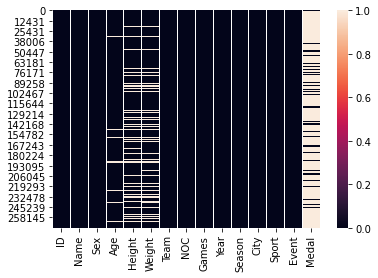

In [11]:
sns.heatmap(athlete_events_s.isnull())

In [12]:
# it looks like all the columns that have missing values are the "Height", "Weight", "Age" and specially the "Medal" column
# but in this case i don't think it's a bad thing since not all the athletes will win something, meaning that a missing value 
# means the athlete won nothing 

In [13]:
((athlete_events_s["Games"].str.strip(" Summer")).astype(int)).equals(athlete_events_s["Year"].astype(int))

True

In [14]:
# now that i'm sure the two columns are the same i'll drop the "Games" one
athlete_events_s = athlete_events_s.drop("Games", axis = 1)

In [15]:
athlete_events_s.Season.unique()

array(['Summer'], dtype=object)

In [16]:
#seems like the "Season" column has just one value which is Summer so i'll drop it

In [17]:
athlete_events_s = athlete_events_s.drop("Season", axis = 1)

In [18]:
print(sorted(list(athlete_events_s["Year"].value_counts().index)))

[1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936, 1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016]


In [19]:
athlete_events_s.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932,Los Angeles,Athletics,Athletics Women's 100 metres,NaN


-----

**Second Dataset:** olympics.csv

In [20]:
# this DF contains the data about each country and the medals they won since 1896 to 2018
olympics_t = pd.read_csv(filepath + "Olympics.csv", delimiter = ",")
olympics_t.head()

,Nation,Population,Exists,Code,First_App,Medal,S_Medal,W_Medal,Apps,Medal.1,...,L20_Apps,L20_Medal,L20_Gold,L20_Silver,L20_Bronze,MostSuccessfulSport,Medals,Golds,Silvers,Bronzes
0,Afghanistan,35530081,YES,AFG,1936,0.14,0.14,0.0,14,2,...,4,2,0,0,2,Taekwondo,2,0,0,2
1,Albania,2930187,YES,ALB,1972,0.00,0.00,0.0,12,0,...,9,0,0,0,0,-,0,0,0,0
2,Algeria,41318142,YES,ALG,1964,1.06,1.31,0.0,16,17,...,7,10,2,4,4,Athletics,9,4,3,2
3,American Samoa,55641,YES,ASA,1988,0.00,0.00,0.0,9,0,...,5,0,0,0,0,-,0,0,0,0
4,Andorra,76965,YES,AND,1976,0.00,0.00,0.0,23,0,...,11,0,0,0,0,-,0,0,0,0


In [21]:
olympics_t.columns

Index(['Nation', 'Population', 'Exists', 'Code', 'First_App', 'Medal',
       'S_Medal', 'W_Medal', 'Apps', 'Medal.1', 'Gold', 'Silver', 'Bronze',
       'SO_Apps', 'SO_Medal', 'SO_Gold', 'SO_Silver', 'SO_Bronze', 'WO_Apps',
       'WO_Medal', 'WO_Gold', 'WO_Silver', 'WO_Bronze', 'L20_Apps',
       'L20_Medal', 'L20_Gold', 'L20_Silver', 'L20_Bronze',
       'MostSuccessfulSport', 'Medals', 'Golds', 'Silvers', 'Bronzes'],
      dtype='object')

In [22]:
olympics_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Nation               226 non-null    object 
 1   Population           226 non-null    int64  
 2   Exists               226 non-null    object 
 3   Code                 226 non-null    object 
 4   First_App            226 non-null    int64  
 5   Medal                226 non-null    float64
 6   S_Medal              226 non-null    float64
 7   W_Medal              226 non-null    float64
 8   Apps                 226 non-null    int64  
 9   Medal.1              226 non-null    int64  
 10  Gold                 226 non-null    int64  
 11  Silver               226 non-null    int64  
 12  Bronze               226 non-null    int64  
 13  SO_Apps              226 non-null    int64  
 14  SO_Medal             226 non-null    int64  
 15  SO_Gold              226 non-null    int

In [23]:
olympics_s = olympics_t.drop(["Medal", "W_Medal", "Apps", "Medal.1", "Gold", "Silver", "Bronze", 
                              "WO_Apps", "WO_Medal", "WO_Gold", "WO_Silver", "WO_Bronze"], axis = 1)

In [24]:
olympics_s.head(3)

,Nation,Population,Exists,Code,First_App,S_Medal,SO_Apps,SO_Medal,SO_Gold,SO_Silver,...,L20_Apps,L20_Medal,L20_Gold,L20_Silver,L20_Bronze,MostSuccessfulSport,Medals,Golds,Silvers,Bronzes
0,Afghanistan,35530081,YES,AFG,1936,0.14,14,2,0,0,...,4,2,0,0,2,Taekwondo,2,0,0,2
1,Albania,2930187,YES,ALB,1972,0.00,8,0,0,0,...,9,0,0,0,0,-,0,0,0,0
2,Algeria,41318142,YES,ALG,1964,1.31,13,17,5,4,...,7,10,2,4,4,Athletics,9,4,3,2


In [25]:
olympics_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Nation               226 non-null    object 
 1   Population           226 non-null    int64  
 2   Exists               226 non-null    object 
 3   Code                 226 non-null    object 
 4   First_App            226 non-null    int64  
 5   S_Medal              226 non-null    float64
 6   SO_Apps              226 non-null    int64  
 7   SO_Medal             226 non-null    int64  
 8   SO_Gold              226 non-null    int64  
 9   SO_Silver            226 non-null    int64  
 10  SO_Bronze            226 non-null    int64  
 11  L20_Apps             226 non-null    int64  
 12  L20_Medal            226 non-null    int64  
 13  L20_Gold             226 non-null    int64  
 14  L20_Silver           226 non-null    int64  
 15  L20_Bronze           226 non-null    int

In [26]:
olympics_s = olympics_s.rename(columns = {"S_Medal" : "Avg_Medal", "SO_Apps" : "Apps", "SO_Medal" : "Total", 
                             "SO_Gold" : "Gold", "SO_Silver" : "Silver", "SO_Bronze" : "Bronze"})

In [27]:
# i dropped a few columns that had info either about the total apps in the olympics summer and winter, or the total winter apps
# "Medal", "W_Medal", "Apps", "Medal.1", "Gold", "Silver", "Bronze", "WO_Apps", "WO_Medal", "WO_Gold", "WO_Silver", "WO_Bronze"
# and i will drop more columns that seem to have info that have to do with total games
# "L20_Apps", "L20_Medal", "L20_Gold", "L20_Silver", "L20_Bronze"
# "Medals", "Golds", "Silvers", "Bronzes" this might have data about Winter games but most are more likely to do with the Summer
# Games

In [28]:
olympics_s = olympics_s.drop(["L20_Apps", "L20_Medal", "L20_Gold", "L20_Silver", "L20_Bronze"], axis = 1)

<AxesSubplot:>

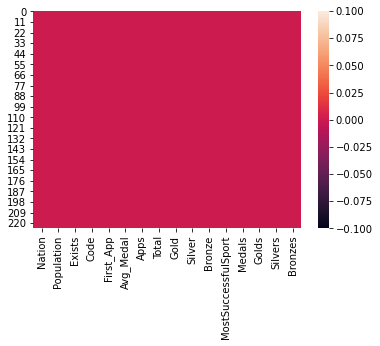

In [29]:
sns.heatmap(olympics_s.isnull())

In [30]:
print(sorted(list(olympics_s.First_App.value_counts().index)))

[1896, 1900, 1904, 1908, 1912, 1920, 1924, 1928, 1932, 1936, 1948, 1952, 1956, 1960, 1964, 1966, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1994, 1996, 2000, 2004, 2008, 2016, 2018]


In [31]:
olympics_s.head()

,Nation,Population,Exists,Code,First_App,Avg_Medal,Apps,Total,Gold,Silver,Bronze,MostSuccessfulSport,Medals,Golds,Silvers,Bronzes
0,Afghanistan,35530081,YES,AFG,1936,0.14,14,2,0,0,2,Taekwondo,2,0,0,2
1,Albania,2930187,YES,ALB,1972,0.00,8,0,0,0,0,-,0,0,0,0
2,Algeria,41318142,YES,ALG,1964,1.31,13,17,5,4,8,Athletics,9,4,3,2
3,American Samoa,55641,YES,ASA,1988,0.00,8,0,0,0,0,-,0,0,0,0
4,Andorra,76965,YES,AND,1976,0.00,11,0,0,0,0,-,0,0,0,0


-----

**Third Dataset:** Summer-Olympic-medals-1976-to-2008.csv

In [32]:
# this DF has data about the medals for each event in the summer olympics 1976-2008
summer_olympics = pd.read_csv(filepath + "Summer-Olympic-medals-1976-to-2008.csv", delimiter = ",")
summer_olympics

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"K�HLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze
...,...,...,...,...,...,...,...,...,...,...,...
15428,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"GUENOT, Christophe",Men,FRA,France,M,Bronze
15429,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"KVIRKELIA, Manuchar",Men,GEO,Georgia,M,Gold
15430,Beijing,2008.0,Wrestling,Wrestling Gre-R,55 - 60kg,"RAHIMOV, Vitaliy",Men,AZE,Azerbaijan,M,Silver
15431,Beijing,2008.0,Wrestling,Wrestling Gre-R,60 - 66kg,"GUENOT, Steeve",Men,FRA,France,M,Gold


In [33]:
summer_olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15433 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.3+ MB


<AxesSubplot:>

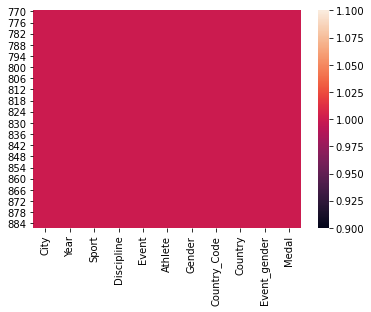

In [34]:
sns.heatmap(summer_olympics[summer_olympics["Year"].isnull() == True].isnull())

<AxesSubplot:>

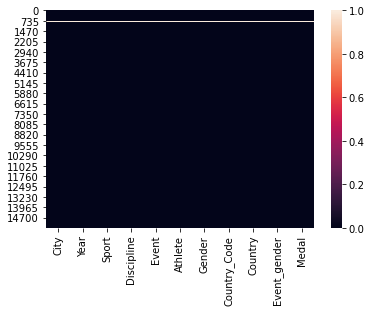

In [35]:
sns.heatmap(summer_olympics.isnull())

In [36]:
# it looks like there's a big portion of the dataset that's missing, luckily it's connected so i can drop it at once

In [37]:
idx_missing = summer_olympics[summer_olympics["Year"].isnull() == True].index

In [38]:
idx_missing

Int64Index([770, 771, 772, 773, 774, 775, 776, 777, 778, 779,
            ...
            877, 878, 879, 880, 881, 882, 883, 884, 885, 886],
           dtype='int64', length=117)

In [39]:
summer_olympics = summer_olympics.drop(idx_missing)

In [40]:
summer_olympics["Year"] = pd.to_numeric(summer_olympics.Year, downcast = 'integer')

In [41]:
print(sorted(list(summer_olympics.Year.value_counts().index)))

[1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008]


In [42]:
summer_olympics

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976,Aquatics,Diving,3m springboard,"K�HLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze
...,...,...,...,...,...,...,...,...,...,...,...
15428,Beijing,2008,Wrestling,Wrestling Gre-R,66 - 74kg,"GUENOT, Christophe",Men,FRA,France,M,Bronze
15429,Beijing,2008,Wrestling,Wrestling Gre-R,66 - 74kg,"KVIRKELIA, Manuchar",Men,GEO,Georgia,M,Gold
15430,Beijing,2008,Wrestling,Wrestling Gre-R,55 - 60kg,"RAHIMOV, Vitaliy",Men,AZE,Azerbaijan,M,Silver
15431,Beijing,2008,Wrestling,Wrestling Gre-R,60 - 66kg,"GUENOT, Steeve",Men,FRA,France,M,Gold


> I will not be using this dataset as it seems to cover less data than the athletes_events one and over a less period

---

**Overview of the main datasets**

In [43]:
olympics_s.head()

,Nation,Population,Exists,Code,First_App,Avg_Medal,Apps,Total,Gold,Silver,Bronze,MostSuccessfulSport,Medals,Golds,Silvers,Bronzes
0,Afghanistan,35530081,YES,AFG,1936,0.14,14,2,0,0,2,Taekwondo,2,0,0,2
1,Albania,2930187,YES,ALB,1972,0.00,8,0,0,0,0,-,0,0,0,0
2,Algeria,41318142,YES,ALG,1964,1.31,13,17,5,4,8,Athletics,9,4,3,2
3,American Samoa,55641,YES,ASA,1988,0.00,8,0,0,0,0,-,0,0,0,0
4,Andorra,76965,YES,AND,1976,0.00,11,0,0,0,0,-,0,0,0,0


In [44]:
athlete_events_s.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932,Los Angeles,Athletics,Athletics Women's 100 metres,NaN


---

**Fourth Dataset** Tokyo Datasets

In [45]:
tokyo_athletes = pd.read_excel(r'C:\Users\abdelilah\Downloads\Olympic Games\2021 Tokyo\Athletes.xlsx')
tokyo_genders = pd.read_excel(r'C:\Users\abdelilah\Downloads\Olympic Games\2021 Tokyo\EntriesGender.xlsx')
tokyo_medals = pd.read_excel(r'C:\Users\abdelilah\Downloads\Olympic Games\2021 Tokyo\Medals.xlsx')

C:\Users\abdelilah\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [46]:
tokyo_athletes.head()

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball


In [47]:
tokyo_genders.head()

,Discipline,Female,Male,Total
0,3x3 Basketball,32,32,64
1,Archery,64,64,128
2,Artistic Gymnastics,98,98,196
3,Artistic Swimming,105,0,105
4,Athletics,969,1072,2041


In [48]:
tokyo_medals.head()

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


-----

>There are three two main types of datasets, either a Medals one that contains the count of medals won by each country and the second is an Athletes one that has the different data on athletes that competed in these events 

**Fifth Dataset:** Nation and their Codes

In [49]:
noc = pd.read_csv("https://gist.githubusercontent.com/radcliff/f09c0f88344a7fcef373/raw/2753c482ad091c54b1822288ad2e4811c021d8ec/wikipedia-iso-country-codes.csv")
noc.head(3)

,English short name lower case,Alpha-2 code,Alpha-3 code,Numeric code,ISO 3166-2
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX
2,Albania,AL,ALB,8,ISO 3166-2:AL


In [50]:
noc = noc.drop(["Alpha-2 code", "Numeric code", "ISO 3166-2"], axis = 1)

In [51]:
noc = noc.rename(columns = {"English short name lower case" : "Team/NOC", "Alpha-3 code" : "Code"})

In [52]:
noc

,Team/NOC,Code
0,Afghanistan,AFG
1,Åland Islands,ALA
2,Albania,ALB
3,Algeria,DZA
4,American Samoa,ASM
...,...,...
241,Wallis and Futuna,WLF
242,Western Sahara,ESH
243,Yemen,YEM
244,Zambia,ZMB


---- 

**I need to update the olympics_s DF's medals with medals form the 'tokyo_medals' DF and to do that i have to first add a column with NOCs to the 'tokyo_medals' DF by using the noc DF then i can use some updating function that matches the NOCs from both DFs**

In [53]:
tokyo_medals = tokyo_medals.merge(noc, on = "Team/NOC", how = 'left')

In [54]:
mssg_nats = list(tokyo_medals[tokyo_medals["Code"].isnull() == True]["Team/NOC"])

In [55]:
mssg_codes = ["USA", "CHN", "ROC", "GBR", "KOR", "TWN", "IRN", "HKG", "VEN", "XKX", "MDA", "MKD"]

In [56]:
mssg = pd.DataFrame(columns = ["Nation", "Code"])

In [57]:
mssg["Nation"] = mssg_nats
mssg["Code"] = mssg_codes

In [58]:
mssg

,Nation,Code
0,United States of America,USA
1,People's Republic of China,CHN
2,Great Britain,ROC
3,ROC,GBR
4,Republic of Korea,KOR
5,Islamic Republic of Iran,TWN
6,Chinese Taipei,IRN
7,Kosovo,HKG
8,Venezuela,VEN
9,"Hong Kong, China",XKX


In [59]:
for nat in mssg_nats:
    tokyo_medals.loc[tokyo_medals["Team/NOC"] == nat,"Code"] = mssg.loc[mssg["Nation"] == nat, "Code"]

In [60]:
tokyo_medals = tokyo_medals[["Rank", "Team/NOC", "Code", "Gold", "Silver", "Bronze", "Total", "Rank by Total"]]

**1st part is done as i added a column with the codes of the countries to the 'tokyo_medals'**

In [61]:
tokyo_medals.head(2)

,Rank,Team/NOC,Code,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,USA,39,41,33,113,1
1,2,People's Republic of China,CHN,38,32,18,88,2


In [62]:
olympics_s.head(2)

,Nation,Population,Exists,Code,First_App,Avg_Medal,Apps,Total,Gold,Silver,Bronze,MostSuccessfulSport,Medals,Golds,Silvers,Bronzes
0,Afghanistan,35530081,YES,AFG,1936,0.14,14,2,0,0,2,Taekwondo,2,0,0,2
1,Albania,2930187,YES,ALB,1972,0.00,8,0,0,0,0,-,0,0,0,0


In [63]:
updated = olympics_s.merge(tokyo_medals, how='left', on=['Code'], suffixes=('', '_new'))

In [64]:
updated = updated.drop(["Rank by Total", "Rank", "Team/NOC"], axis = 1)

In [65]:
updated.head(2)

,Nation,Population,Exists,Code,First_App,Avg_Medal,Apps,Total,Gold,Silver,Bronze,MostSuccessfulSport,Medals,Golds,Silvers,Bronzes,Gold_new,Silver_new,Bronze_new,Total_new
0,Afghanistan,35530081,YES,AFG,1936,0.14,14,2,0,0,2,Taekwondo,2,0,0,2,NaN,NaN,NaN,NaN
1,Albania,2930187,YES,ALB,1972,0.00,8,0,0,0,0,-,0,0,0,0,NaN,NaN,NaN,NaN


> Not only do i have to add each type of medal and the total with its counterpart from the other DF but also update the number of apps and the average medals won, so i'll just add 1 to every country's "Apps" supposing that almost every country in the dataset has participated this year but hasn't won if the Total of medals is NaN or do a more complicated procedure which is look in the 'tokyo_athletes' and if that country is in the dataset it means it participated so we'll add 1 if not leave it be. 

> that's for the "Apps" column now comes the "Avg_Medal", here we'll wait until we've summed up all the medals then divide the "Total" by "Apps" which will give us the average medals won

In [66]:
tokyo_cntrs = list(tokyo_athletes["NOC"].value_counts().index)
tokyo_cntrs

['United States of America',
 'Japan',
 'Australia',
 "People's Republic of China",
 'Germany',
 'France',
 'Canada',
 'Great Britain',
 'Italy',
 'Spain',
 'ROC',
 'Brazil',
 'Netherlands',
 'Republic of Korea',
 'New Zealand',
 'Poland',
 'Argentina',
 'South Africa',
 'Mexico',
 'Hungary',
 'Ukraine',
 'Egypt',
 'Sweden',
 'Belgium',
 'Czech Republic',
 'India',
 'Ireland',
 'Switzerland',
 'Belarus',
 'Denmark',
 'Turkey',
 'Romania',
 'Norway',
 'Kazakhstan',
 'Portugal',
 'Israel',
 'Serbia',
 'Kenya',
 'Greece',
 'Austria',
 'Cuba',
 'Chinese Taipei',
 'Islamic Republic of Iran',
 'Colombia',
 'Uzbekistan',
 'Dominican Republic',
 'Jamaica',
 'Nigeria',
 'Croatia',
 'Tunisia',
 'Chile',
 'Slovenia',
 'Morocco',
 'Ecuador',
 'Finland',
 'Venezuela',
 'Mongolia',
 'Ethiopia',
 'Algeria',
 'Bulgaria',
 'Azerbaijan',
 'Hong Kong, China',
 'Thailand',
 'Slovakia',
 'Lithuania',
 'Georgia',
 'Puerto Rico',
 'Montenegro',
 'Estonia',
 'Peru',
 'Saudi Arabia',
 'Bahrain',
 'Trinidad and

In [67]:
# again i have to replace the nations' in this list with its code as the names in the list could be different form the df, such
# as "United States"
tokyo_nocs = []
not_fnd = []
for nat in tokyo_cntrs:
    if nat in tokyo_medals["Team/NOC"].values:
        tokyo_nocs.append(tokyo_medals.loc[tokyo_medals["Team/NOC"] == nat,"Code"].values[0])
        if str(tokyo_medals.loc[tokyo_medals["Team/NOC"] == nat,"Code"].values[0]) == 'nan':
            not_fnd.append(nat)
    else: 
        not_fnd.append(nat)

In [68]:
# i did this as i got 'nan' in my list so i had to clean it
tokyo_nocs = [x for x in tokyo_nocs if str(x) != 'nan']

In [69]:
# i chose to use the tokyo_medals for this as the names are the same and i could avoid not including any names that are
# different, plus this list gives us a clear idea of who participated but won nothing
not_fnd

['Great Britain',
 'ROC',
 'Republic of Korea',
 'Chinese Taipei',
 'Islamic Republic of Iran',
 'Chile',
 'Venezuela',
 'Algeria',
 'Hong Kong, China',
 'Montenegro',
 'Peru',
 'Trinidad and Tobago',
 'Zambia',
 'Refugee Olympic Team',
 'Honduras',
 'Singapore',
 'Guatemala',
 'Angola',
 'Republic of Moldova',
 'Vietnam',
 'Cyprus',
 'Costa Rica',
 'Eritrea',
 'Luxembourg',
 'Cameroon',
 'Uruguay',
 'Kosovo',
 'Pakistan',
 'Senegal',
 'Panama',
 'Sri Lanka',
 'Albania',
 'North Macedonia',
 'Paraguay',
 'Samoa',
 'Mozambique',
 'Nicaragua',
 'Tajikistan',
 'Mauritius',
 'Benin',
 'Papua New Guinea',
 'Guyana',
 'Bosnia and Herzegovina',
 'Barbados',
 'Democratic Republic of the Congo',
 'Niger',
 'Lebanon',
 'Madagascar',
 'Cook Islands',
 'Bangladesh',
 'Burundi',
 'Malta',
 'Monaco',
 'Cape Verde',
 'Haiti',
 'Antigua and Barbuda',
 'Gabon',
 'Cayman Islands',
 'Sudan',
 'Zimbabwe',
 'Seychelles',
 'Saint Lucia',
 'Malawi',
 'Bolivia',
 'Rwanda',
 'Liechtenstein',
 'Guinea',
 'Tonga

In [70]:
not_fnd_2 = []
for nat in not_fnd:
    if nat in noc["Team/NOC"].values:
        tokyo_nocs.append(noc.loc[noc["Team/NOC"] == nat,"Code"].values[0])
        if str(noc.loc[noc["Team/NOC"] == nat,"Code"].values[0]) == 'nan':
            not_fnd_2.append(nat)
    else :
        not_fnd_2.append(nat)

In [71]:
not_fnd_2

['Great Britain',
 'ROC',
 'Republic of Korea',
 'Chinese Taipei',
 'Islamic Republic of Iran',
 'Venezuela',
 'Hong Kong, China',
 'Refugee Olympic Team',
 'Republic of Moldova',
 'Vietnam',
 'Kosovo',
 'North Macedonia',
 'Democratic Republic of the Congo',
 'Bolivia',
 'Virgin Islands, US',
 'Libya',
 'Palestine',
 'Eswatini',
 'Federated States of Micronesia',
 'Democratic Republic of Timor-Leste',
 'United Republic of Tanzania',
 'St Vincent and the Grenadines',
 'South Sudan']

In [72]:
# i had  to add these last ones by typimg them one by one as they couldn't be found in the "Country/Code" DF i have, maybe 
# i chose an old one or the names are mixed and don't have the same notation or both
missing_nocs = ["GBR", "ROC", "KOR", "TWN", "IRN", "MDA", "VNM", "XKX", "MLD", "COD", "BOL", "SWZ", "PSE", 
                "VIR", "LBY", "FSM", "TLS", "TZA", "SSD", "VCT"]

In [73]:
for i in missing_nocs :
    tokyo_nocs.append(i)

**All i did above was taking every country from the 'tokyo_athletes' DF which will enable me to know who participated in the 2021 olympics, then i tried to convert every country name into a country code cuz this way i'll avoid having countries that are the same in both DFs but have different name combinations**

In [74]:
updated.head(1)

,Nation,Population,Exists,Code,First_App,Avg_Medal,Apps,Total,Gold,Silver,Bronze,MostSuccessfulSport,Medals,Golds,Silvers,Bronzes,Gold_new,Silver_new,Bronze_new,Total_new
0,Afghanistan,35530081,YES,AFG,1936,0.14,14,2,0,0,2,Taekwondo,2,0,0,2,NaN,NaN,NaN,NaN


In [75]:
for cod in updated["Code"].values:
    if cod in tokyo_nocs:
        updated.loc[updated["Code"] == cod, "Apps"] += 1

**Now each country's Apps is updated according to their existence in the tokyo_nocs i created**

In [76]:
updated["Total_n"] = ""
updated["Gold_n"] = ""
updated["Silver_n"] = ""
updated["Bronze_n"] = ""

In [77]:
updated["Total_n"] = updated[["Total", "Total_new"]].sum(axis = 1)
updated["Gold_n"] = updated[["Gold", "Gold_new"]].sum(axis = 1)
updated["Silver_n"] = updated[["Silver", "Silver_new"]].sum(axis = 1)
updated["Bronze_n"] = updated[["Bronze", "Bronze_new"]].sum(axis = 1)

In [78]:
updated = updated.drop(["Total", "Total_new", "Gold", "Gold_new", "Silver", "Silver_new", "Bronze", "Bronze_new"], axis = 1)

In [79]:
updated = updated.rename(columns = {"Total_n" : "Total", "Gold_n" : "Gold", "Silver_n" : "Silver", "Bronze_n" : "Bronze"})

In [80]:
updated = updated[["Nation", "Population", "Exists", "Code", "First_App", "Apps", 
                   "Avg_Medal", "Total", "Gold", "Silver", "Bronze", "MostSuccessfulSport", 
                   "Medals", "Golds", "Silvers", "Bronzes"]]

In [81]:
updated["Total"] = updated["Total"].astype(int)
updated["Gold"] = updated["Gold"].astype(int)
updated["Silver"] = updated["Silver"].astype(int)
updated["Bronze"] = updated["Bronze"].astype(int)

In [82]:
updated["Avg_Medal"] = updated["Total"].div(updated["Apps"]).round(2)

In [83]:
updated.head(10)

,Nation,Population,Exists,Code,First_App,Apps,Avg_Medal,Total,Gold,Silver,Bronze,MostSuccessfulSport,Medals,Golds,Silvers,Bronzes
0,Afghanistan,35530081,YES,AFG,1936,15,0.13,2,0,0,2,Taekwondo,2,0,0,2
1,Albania,2930187,YES,ALB,1972,9,0.00,0,0,0,0,-,0,0,0,0
2,Algeria,41318142,YES,ALG,1964,13,1.31,17,5,4,8,Athletics,9,4,3,2
3,American Samoa,55641,YES,ASA,1988,8,0.00,0,0,0,0,-,0,0,0,0
4,Andorra,76965,YES,AND,1976,12,0.00,0,0,0,0,-,0,0,0,0
5,Angola,29784193,YES,ANG,1980,9,0.00,0,0,0,0,-,0,0,0,0
6,Antigua and Barbuda,102012,YES,ANT,1976,10,0.00,0,0,0,0,-,0,0,0,0
7,Argentina,44271041,YES,ARG,1900,25,3.08,77,21,26,30,Footbal,4,2,2,0
8,Armenia,2930450,YES,ARM,1994,7,2.57,18,2,8,8,Wrestling,8,2,3,3
9,Aruba,105264,YES,ARU,1988,8,0.00,0,0,0,0,-,0,0,0,0


**And finally the medals are upadated as well**

> **Now i will work with either the 'athletes_events' dataset or the 'olympics_s' but not the 'tokyo_medals' one as i updated the medals and stuff into the last one**

---

<font size="3"> **- COUNTRIES** </font> 

<font size="2">**1. Medals Won** </font> 

**1.1**   Medals won by countries that don't have 0 Medals total or top 30 <br>


In [84]:
updated.columns

Index(['Nation', 'Population', 'Exists', 'Code', 'First_App', 'Apps',
       'Avg_Medal', 'Total', 'Gold', 'Silver', 'Bronze', 'MostSuccessfulSport',
       'Medals', 'Golds', 'Silvers', 'Bronzes'],
      dtype='object')

In [85]:
updated = updated.sort_values(by = "Total", ascending = False)

In [86]:
updated = updated.reset_index(drop = True)

In [87]:
updated.to_csv(filepath + 'Updated Athlete Events.csv')

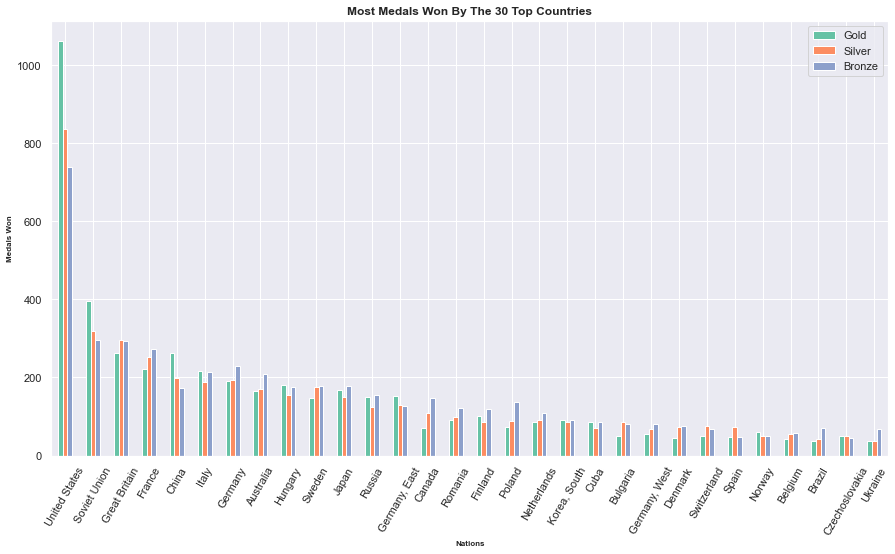

In [88]:
#1.1.1 and best one for this is "olympics_s"
sns.set_theme(palette = "Set2")
updated.head(30).plot(x = "Nation", 
                         y = ["Gold", "Silver", "Bronze"], 
                         kind = "bar", 
                         figsize = (15, 8))
plt.xlabel("Nations", 
           fontdict = {"fontsize" : 8, 
                       "fontweight" : "bold"})
plt.xticks(rotation = 60)
plt.ylabel("Medals Won", 
           fontdict = {"fontsize" : 8, 
                       "fontweight" : "bold"})
plt.title("Most Medals Won By The 30 Top Countries", 
          fontdict = {"fontsize" : 12,
                      "fontweight" : "bold"})

plt.savefig(imagepath + 'Most Medals Won By The 30 Top Countries.png')

**1.2**   Medals won by arab countries <br>

In [89]:
arab_land = pd.read_csv(filepath + "arab_countries.csv", 
                        delimiter = ",", 
                        usecols = ["Country"], 
                        skipfooter = 5, 
                        engine = 'python')
arab_land.head()

,Country
0,NaN
1,NaN
2,NaN
3,NaN
4,Egypt


In [90]:
arab_land = arab_land[4:]

In [91]:
arab_land = arab_land.reset_index(drop = True)

In [92]:
arab_land["Code"] = ""

In [93]:
for nat in arab_land["Country"].values:
    if nat in noc["Team/NOC"].values:
        arab_land.loc[arab_land["Country"] == nat, "Code"] = noc.loc[noc["Team/NOC"] == nat]["Code"].values

In [94]:
arab_land.loc[arab_land["Country"] == "Syria", "Code"] = "SYR"
arab_land.loc[arab_land["Country"] == "Libya", "Code"] = "LBY"
arab_land.loc[arab_land["Country"] == "Palestine", "Code"] = "PSE"

In [95]:
arab_land

,Country,Code
0,Egypt,EGY
1,Algeria,DZA
2,Iraq,IRQ
3,Sudan,SDN
4,Morocco,MAR
5,Saudi Arabia,SAU
6,Yemen,YEM
7,Syria,SYR
8,Tunisia,TUN
9,Somalia,SOM


In [96]:
arab_nocs = list(arab_land["Code"].values)

In [97]:
# at first i thought of using the country codes but it seems like the codes on the 'noc' and the ones on the 'updated' datasets
# are different for some coutries like "United Arab Emirates"
arab_olympics = updated.loc[updated["Nation"].isin(arab_land["Country"].values)]

In [98]:
arab_olympics.head()

,Nation,Population,Exists,Code,First_App,Apps,Avg_Medal,Total,Gold,Silver,Bronze,MostSuccessfulSport,Medals,Golds,Silvers,Bronzes
50,Egypt,97553151,YES,EGY,1912,23,1.65,38,8,11,19,Weightlifting,14,5,3,6
63,Morocco,35739580,YES,MAR,1960,15,1.60,24,7,5,12,Athletics,19,6,5,8
71,Algeria,41318142,YES,ALG,1964,13,1.31,17,5,4,8,Athletics,9,4,3,2
72,Tunisia,11532127,YES,TUN,1960,15,1.00,15,5,3,7,Athletics,5,2,2,1
85,Qatar,2639211,YES,QAT,1984,10,0.80,8,2,1,5,Athletics,3,0,1,2


In [99]:
arab_olympics.to_csv(filepath + 'Arab Olympics.csv')

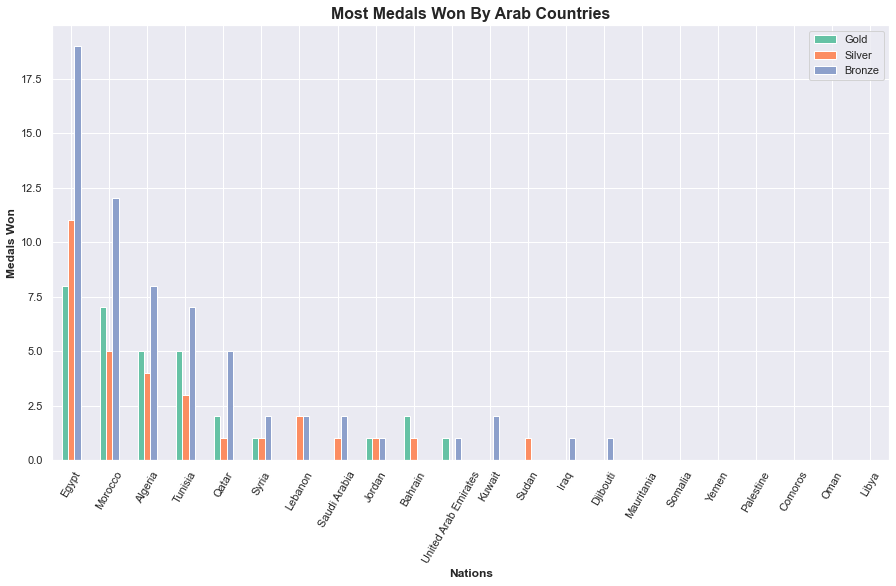

In [100]:
sns.set_theme(palette = "Set2")
arab_olympics.head(30).plot(x = "Nation", 
                            y = ["Gold", "Silver", "Bronze"], 
                            kind = "bar", 
                            figsize = (15, 8))
plt.xlabel("Nations", 
           fontdict = {"fontsize" : 12, 
                       "fontweight" : "bold"})
plt.xticks(rotation = 60)
plt.ylabel("Medals Won", 
           fontdict = {"fontsize" : 12, 
                       "fontweight" : "bold"})
plt.title("Most Medals Won By Arab Countries", 
          fontdict = {"fontsize" : 16, 
                      "fontweight" : "bold"})

plt.savefig(imagepath + "Most Medals Won By Arab Countries.png")

**2. Most popular Discipline**

In [101]:
succ_sports = pd.DataFrame(columns = ["Sport", "Count"])
succ_sports.Sport = updated["MostSuccessfulSport"].value_counts().index
succ_sports.Count = updated["MostSuccessfulSport"].value_counts().values

In [102]:
succ_sports.head()

,Sport,Count
0,-,79
1,Athletics,41
2,Wrestling,12
3,Boxing,11
4,Weightlifting,7


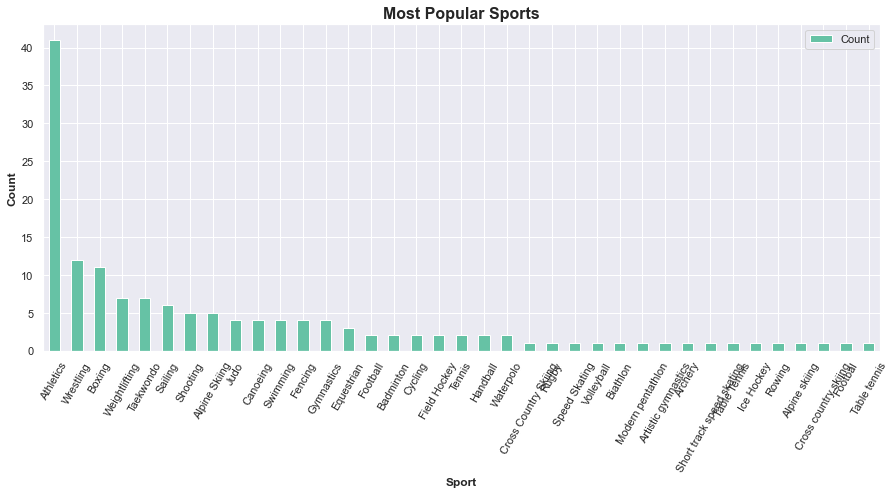

In [103]:
succ_sports[1:].plot(x = "Sport", 
                 y = "Count", 
                 kind = "bar", 
                 figsize = (15, 6))
plt.xlabel("Sport", 
           fontdict = {"fontsize" : 12, 
                       "fontweight" : "bold"})
plt.xticks(rotation = 60)
plt.ylabel("Count", 
           fontdict = {"fontsize" : 12, 
                       "fontweight" : "bold"})
plt.title("Most Popular Sports", 
          fontdict = {"fontsize" : 16, 
                      "fontweight" : "bold"})

plt.savefig(imagepath + "Most popular Sports.png")

**3- Best Average Among:**

<StemContainer object of 3 artists>

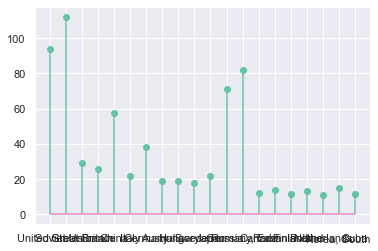

In [104]:
plt.stem(updated[:20]["Nation"], updated[:20]["Avg_Medal"])

<font size="3"> **- GENDER VISUALIZATIONS:** </font>

**1. Medals Won over the Years**

In [105]:
athlete_events_s.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920,Antwerpen,Football,Football Men's Football,NaN


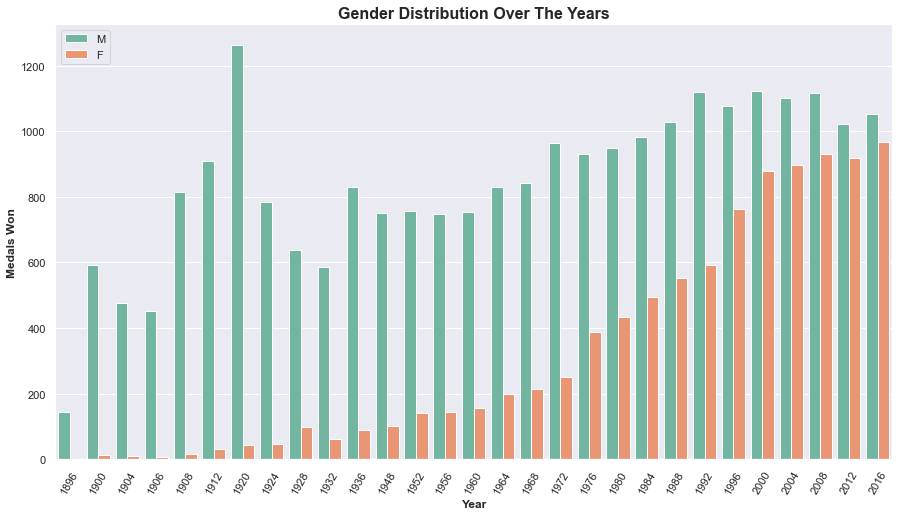

In [106]:
plt.figure(figsize = (15, 8))
sns.countplot(x = "Year", 
              hue = "Sex", 
              data = athlete_events_s[athlete_events_s["Medal"].notna()])
plt.xlabel("Year", 
           fontdict = {"fontsize" : 12, 
                       "fontweight" : "bold"})
plt.xticks(rotation = 60)
plt.ylabel("Medals Won", 
           fontdict = {"fontsize" : 12, 
                       "fontweight" : "bold"})
plt.title("Gender Distribution Over The Years", 
          fontdict = {"fontsize" : 16, 
                      "fontweight" : "bold"})
plt.legend(loc = 'upper left')

plt.savefig(imagepath + 'Gender Distribution Over The Years.png')

In [107]:
athlete_events_s["Medal"].dropna()

3           Gold
37        Bronze
38        Bronze
41        Bronze
42          Gold
           ...  
271078    Silver
271080    Bronze
271082    Bronze
271102    Bronze
271103    Silver
Name: Medal, Length: 34088, dtype: object

**2. Events / Countries and Gender Participation**

**2.1** Countries & Gender

In [108]:
# what i wanna do here is see what's the distribution like for each country's athletes and their gender, in conclusion figure
# out if there's a country where the count of female participants is more than their male counterpart
# it looks like a scatter plot is the most convenient kind of graph i can use as it will plot every country

In [109]:
athlete_events_s.sort_values(by = "NOC")

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,City,Sport,Event,Medal
67193,34349,Hussain Fazal,M,29.0,NaN,NaN,Afghanistan,AFG,1936,Berlin,Hockey,Hockey Men's Hockey,NaN
217225,109113,Abouwi Ahmad Shah,M,NaN,NaN,NaN,Afghanistan,AFG,1936,Berlin,Hockey,Hockey Men's Hockey,NaN
217241,109123,Mian Faruq Shah,M,29.0,NaN,NaN,Afghanistan,AFG,1936,Berlin,Hockey,Hockey Men's Hockey,NaN
217252,109130,Zahir Shah Al-Zadah,M,25.0,NaN,NaN,Afghanistan,AFG,1936,Berlin,Hockey,Hockey Men's Hockey,NaN
217294,109153,Shakar Khan Shakar,M,24.0,NaN,74.0,Afghanistan,AFG,1964,Tokyo,Wrestling,"Wrestling Men's Welterweight, Freestyle",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45643,23549,Kirsty Leigh Coventry (-Seward),F,20.0,176.0,64.0,Zimbabwe,ZIM,2004,Athina,Swimming,Swimming Women's 200 metres Individual Medley,Bronze
22428,11813,Clyde Cecil Bissett,M,NaN,NaN,NaN,Zimbabwe,ZIM,1928,Amsterdam,Boxing,Boxing Men's Lightweight,NaN
154398,77513,Michael McFadden,M,28.0,183.0,94.0,Zimbabwe,ZIM,1964,Tokyo,Sailing,Sailing Mixed One Person Dinghy,NaN
164733,82724,Samukeliso Moyo,F,26.0,160.0,48.0,Zimbabwe,ZIM,2000,Sydney,Athletics,"Athletics Women's 5,000 metres",NaN


In [110]:
print(sorted(athlete_events_s.NOC.unique())) # length is 230

['AFG', 'AHO', 'ALB', 'ALG', 'AND', 'ANG', 'ANT', 'ANZ', 'ARG', 'ARM', 'ARU', 'ASA', 'AUS', 'AUT', 'AZE', 'BAH', 'BAN', 'BAR', 'BDI', 'BEL', 'BEN', 'BER', 'BHU', 'BIH', 'BIZ', 'BLR', 'BOH', 'BOL', 'BOT', 'BRA', 'BRN', 'BRU', 'BUL', 'BUR', 'CAF', 'CAM', 'CAN', 'CAY', 'CGO', 'CHA', 'CHI', 'CHN', 'CIV', 'CMR', 'COD', 'COK', 'COL', 'COM', 'CPV', 'CRC', 'CRO', 'CRT', 'CUB', 'CYP', 'CZE', 'DEN', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'ERI', 'ESA', 'ESP', 'EST', 'ETH', 'EUN', 'FIJ', 'FIN', 'FRA', 'FRG', 'FSM', 'GAB', 'GAM', 'GBR', 'GBS', 'GDR', 'GEO', 'GEQ', 'GER', 'GHA', 'GRE', 'GRN', 'GUA', 'GUI', 'GUM', 'GUY', 'HAI', 'HKG', 'HON', 'HUN', 'INA', 'IND', 'IOA', 'IRI', 'IRL', 'IRQ', 'ISL', 'ISR', 'ISV', 'ITA', 'IVB', 'JAM', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KIR', 'KOR', 'KOS', 'KSA', 'KUW', 'LAO', 'LAT', 'LBA', 'LBR', 'LCA', 'LES', 'LIB', 'LIE', 'LTU', 'LUX', 'MAD', 'MAL', 'MAR', 'MAS', 'MAW', 'MDA', 'MDV', 'MEX', 'MGL', 'MHL', 'MKD', 'MLI', 'MLT', 'MNE', 'MON', 'MOZ', 'MRI', 'MTN', 'MYA', 'NAM'

In [111]:
noc_genders = pd.DataFrame(columns = ["Country", "Code", "Male", "Female", "Total"])

In [112]:
noc_genders["Code"] = athlete_events_s.NOC.unique()

In [113]:
not_fnd_3 = []
for cod in noc_genders.Code.values:
    if cod in noc["Code"].values:
        noc_genders.loc[noc_genders["Code"] == cod, "Country"] = noc.loc[noc["Code"] == cod, "Team/NOC"].values
    else : 
        not_fnd_3.append(cod)

In [114]:
print(not_fnd_3)

['DEN', 'NED', 'IRI', 'BUL', 'CHA', 'SUD', 'GRE', 'CHI', 'URS', 'NCA', 'NGR', 'ALG', 'KUW', 'UAR', 'LIB', 'MAS', 'GER', 'RSA', 'TAN', 'LBA', 'PLE', 'BRU', 'KSA', 'UAE', 'YAR', 'INA', 'PHI', 'EUN', 'CGO', 'SUI', 'GDR', 'MON', 'URU', 'SRI', 'NIG', 'CRC', 'SLO', 'POR', 'PAR', 'ANG', 'FRG', 'BAN', 'ESA', 'PUR', 'HON', 'MRI', 'SEY', 'TCH', 'MTN', 'SKN', 'VIN', 'NEP', 'MGL', 'TOG', 'AHO', 'ASA', 'SAM', 'CRO', 'HAI', 'GUI', 'BIZ', 'YMD', 'BER', 'ANZ', 'SCG', 'IOA', 'OMA', 'FIJ', 'VAN', 'BAH', 'GUA', 'YUG', 'LAT', 'IVB', 'ISV', 'MAD', 'MAL', 'CAY', 'BAR', 'GBS', 'BOT', 'ROT', 'CAM', 'SOL', 'CRT', 'GEQ', 'SAA', 'ZIM', 'GRN', 'MYA', 'MAW', 'ZAM', 'RHO', 'TPE', 'BOH', 'GAM', 'WIF', 'BUR', 'NBO', 'ARU', 'VIE', 'BHU', 'UNK', 'TGA', 'NFL', 'KOS', 'SSD', 'LES']


In [115]:
not_fnd_4 = []
for cod in not_fnd_3:
    if cod in athlete_events_s["NOC"].values:
        noc_genders.loc[noc_genders["Code"] == cod, "Country"] = athlete_events_s.loc[athlete_events_s["NOC"] == cod, "Team"].values[0]
    else : 
        not_fnd_4.append(cod)

In [116]:
noc_genders

,Country,Code,Male,Female,Total
0,China,CHN,NaN,NaN,NaN
1,Denmark,DEN,NaN,NaN,NaN
2,Netherlands,NED,NaN,NaN,NaN
3,Finland,FIN,NaN,NaN,NaN
4,Norway,NOR,NaN,NaN,NaN
...,...,...,...,...,...
225,Tonga,TGA,NaN,NaN,NaN
226,Newfoundland,NFL,NaN,NaN,NaN
227,Kosovo,KOS,NaN,NaN,NaN
228,South Sudan,SSD,NaN,NaN,NaN


In [117]:
ath_events_np = athlete_events_s.to_numpy()

In [118]:
noc_genders_np = noc_genders.to_numpy()

In [119]:
unique_keys, indices = np.unique(ath_events_np[:,1], return_index=True)

In [120]:
# this array included one record of each athlete
ath_events = ath_events_np[indices]

In [121]:
np.set_printoptions(threshold=np.inf)

In [122]:
ath_events[1]

array([107953, ' Eleonora Margarida Josephina Scmitt', 'F', 16.0, nan,
       nan, 'Brazil', 'BRA', 1948, 'London', 'Swimming',
       "Swimming Women's 100 metres Freestyle", nan], dtype=object)

In [123]:
noc_genders_np[1]

array(['Denmark', 'DEN', nan, nan, nan], dtype=object)

In [124]:
ath_events[(ath_events[:,7] == "BRA") & (ath_events[:,2] == "F")].shape[0]

557

In [125]:
ath_events[ath_events[:,1] == "Michael Fred Phelps, II"]

array([[94406, 'Michael Fred Phelps, II', 'M', 15.0, 193.0, 91.0,
        'United States', 'USA', 2000, 'Sydney', 'Swimming',
        "Swimming Men's 200 metres Butterfly", nan]], dtype=object)

In [126]:
noc_genders_np[noc_genders_np[:,1] == "BRA", 3]

array([nan], dtype=object)

In [127]:
male = 0
female = 0
for cod in noc_genders_np[:,[1]]:
    male = ath_events[(ath_events[:,7] == cod) & (ath_events[:,2] == "M")].shape[0]
    female = ath_events[(ath_events[:,7] == cod) & (ath_events[:,2] == "F")].shape[0]
    noc_genders_np[noc_genders_np[:,1] == cod, 3] = male
    noc_genders_np[noc_genders_np[:,1] == cod, 2] = female
    noc_genders_np[noc_genders_np[:,1] == cod, 4] = male + female

In [128]:
noc_genders.loc[[1,2,3]]

,Country,Code,Male,Female,Total
1,Denmark,DEN,329,1532,1861
2,Netherlands,NED,775,1943,2718
3,Finland,FIN,219,1410,1629


In [129]:
noc_genders_np[[1,2,3]]

array([['Denmark', 'DEN', 329, 1532, 1861],
       ['Netherlands', 'NED', 775, 1943, 2718],
       ['Finland', 'FIN', 219, 1410, 1629]], dtype=object)

> I tried using pandas for these kind of df builds but it's too slow so i'll just depend from now on on just building them using Numpy 

In [130]:
noc_genders = noc_genders.sort_values(by = "Total", ascending = False)
noc_genders = noc_genders.reset_index(drop = True)

In [131]:
noc_genders.to_csv(filepath + 'Gender Distribution per Country.csv')

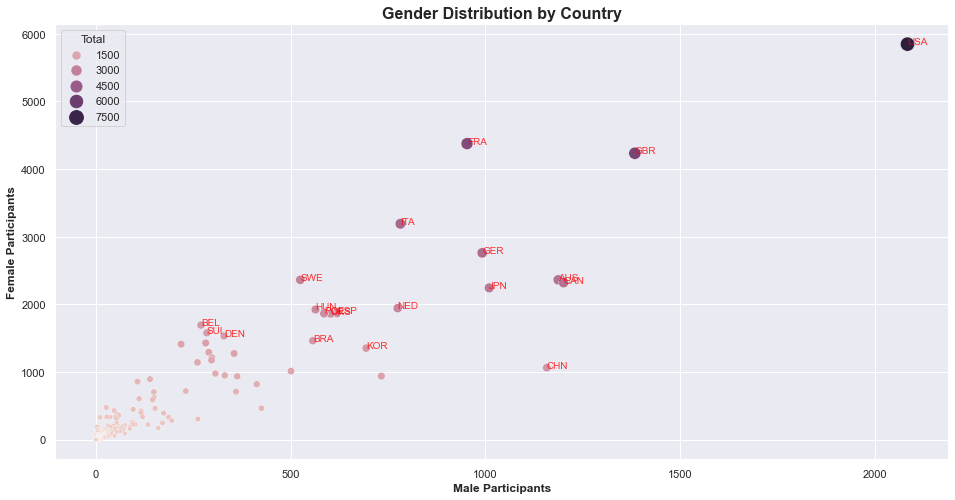

In [132]:
plt.figure(figsize = (16, 8))
sns.scatterplot(data = noc_genders, 
                x = "Male", 
                y = "Female", 
                hue = "Total", 
                size = "Total", 
                sizes = (20, 200))
plt.xlabel("Male Participants", 
           fontdict = {"fontsize" : 12, 
                       "fontweight" : "bold"})
plt.ylabel("Female Participants", 
           fontdict = {"fontsize" : 12, 
                       "fontweight" : "bold"})
plt.title("Gender Distribution by Country", 
          fontdict = {"fontsize" : 16, 
                      "fontweight" : "bold"})
for i in range(0,20):
    ax = plt.text(x = noc_genders.Male[i], 
             y = noc_genders.Female[i], 
             s = noc_genders.Code[i], 
             fontdict = dict(color='red',size=10)
             #bbox = dict(facecolor='yellow',alpha=0.5)
                 )
    ax.set_alpha(.8)

plt.savefig(imagepath + 'Gender Distribution by Country.png')

**2.2** Events & Gender

In [133]:
tokyo_genders.Discipline.unique() #46

array(['3x3 Basketball', 'Archery', 'Artistic Gymnastics',
       'Artistic Swimming', 'Athletics', 'Badminton', 'Baseball/Softball',
       'Basketball', 'Beach Volleyball', 'Boxing', 'Canoe Slalom',
       'Canoe Sprint', 'Cycling BMX Freestyle', 'Cycling BMX Racing',
       'Cycling Mountain Bike', 'Cycling Road', 'Cycling Track', 'Diving',
       'Equestrian', 'Fencing', 'Football', 'Golf', 'Handball', 'Hockey',
       'Judo', 'Karate', 'Marathon Swimming', 'Modern Pentathlon',
       'Rhythmic Gymnastics', 'Rowing', 'Rugby Sevens', 'Sailing',
       'Shooting', 'Skateboarding', 'Sport Climbing', 'Surfing',
       'Swimming', 'Table Tennis', 'Taekwondo', 'Tennis',
       'Trampoline Gymnastics', 'Triathlon', 'Volleyball', 'Water Polo',
       'Weightlifting', 'Wrestling'], dtype=object)

In [134]:
sports = (athlete_events_s.Sport.unique()) #52, and 28 in common

In [135]:
yyyy = []

In [136]:
yyyy = [tokyo_genders.Discipline.unique()[i] for i in range(46) if tokyo_genders.Discipline.unique()[i] in athlete_events_s.Sport.unique()]

In [137]:
print(yyyy)

['Archery', 'Athletics', 'Badminton', 'Basketball', 'Beach Volleyball', 'Boxing', 'Diving', 'Fencing', 'Football', 'Golf', 'Handball', 'Hockey', 'Judo', 'Modern Pentathlon', 'Rhythmic Gymnastics', 'Rowing', 'Rugby Sevens', 'Sailing', 'Shooting', 'Swimming', 'Table Tennis', 'Taekwondo', 'Tennis', 'Triathlon', 'Volleyball', 'Water Polo', 'Weightlifting', 'Wrestling']


In [138]:
tokyo_genders.head(2)

,Discipline,Female,Male,Total
0,3x3 Basketball,32,32,64
1,Archery,64,64,128


In [139]:
athlete_events_s.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,NaN


In [140]:
evnt_genders = pd.DataFrame(columns = ["Discipline", "Female", "Male", "Total"])
evnt_genders["Discipline"] = athlete_events_s.Sport.unique()

In [141]:
evnt_genders["Female"] = 0
evnt_genders["Male"] = 0
evnt_genders["Total"] = 0

In [142]:
athlete_events_s.loc[athlete_events_s["Sport"] == "Basketball", "Sex"].values.size

4536

In [143]:
evnt_genders.loc[evnt_genders["Discipline"] == "Basketball", "Male"]

0    0
Name: Male, dtype: int64

In [144]:
evnt_genders_np = evnt_genders.to_numpy()

In [145]:
evnt_genders_np[1] #disc , f, m, t

array(['Judo', 0, 0, 0], dtype=object)

In [146]:
ath_events[1]

array([107953, ' Eleonora Margarida Josephina Scmitt', 'F', 16.0, nan,
       nan, 'Brazil', 'BRA', 1948, 'London', 'Swimming',
       "Swimming Women's 100 metres Freestyle", nan], dtype=object)

In [147]:
(ath_events[ath_events[:,10] == "Judo"][:,2]).size

2702

In [148]:
evnt_genders_np[evnt_genders_np[:,0] == "Judo", 2]

array([0], dtype=object)

In [149]:
for evnt in sports:
    for s in ath_events[ath_events[:,10] == evnt][:,2]:
        if s == "M":
            evnt_genders_np[evnt_genders_np[:,0] == evnt, 2] += 1
            evnt_genders_np[evnt_genders_np[:,0] == evnt, 3] += 1
        elif s == "F" :
            evnt_genders_np[evnt_genders_np[:,0] == evnt, 1] += 1
            evnt_genders_np[evnt_genders_np[:,0] == evnt, 3] += 1

In [150]:
evnt_genders_np

array([['Basketball', 926, 2460, 3386],
       ['Judo', 752, 1950, 2702],
       ['Football', 728, 5401, 6129],
       ['Tug-Of-War', 0, 155, 155],
       ['Athletics', 6501, 15406, 21907],
       ['Swimming', 3603, 5000, 8603],
       ['Badminton', 409, 396, 805],
       ['Sailing', 628, 3826, 4454],
       ['Gymnastics', 1491, 2592, 4083],
       ['Art Competitions', 203, 1587, 1790],
       ['Handball', 1017, 1658, 2675],
       ['Weightlifting', 354, 2487, 2841],
       ['Wrestling', 219, 4721, 4940],
       ['Water Polo', 335, 2194, 2529],
       ['Hockey', 990, 2798, 3788],
       ['Rowing', 1476, 6151, 7627],
       ['Fencing', 873, 3156, 4029],
       ['Equestrianism', 459, 1862, 2321],
       ['Shooting', 728, 4091, 4819],
       ['Boxing', 63, 5158, 5221],
       ['Taekwondo', 229, 241, 470],
       ['Cycling', 708, 5077, 5785],
       ['Diving', 622, 824, 1446],
       ['Canoeing', 697, 2485, 3182],
       ['Tennis', 485, 752, 1237],
       ['Modern Pentathlon', 113, 729, 84

In [151]:
evnt_genders = pd.DataFrame(evnt_genders_np, columns = ["Discipline", "Female", "Male", "Total"])

In [152]:
evnt_genders

,Discipline,Female,Male,Total
0,Basketball,926,2460,3386
1,Judo,752,1950,2702
2,Football,728,5401,6129
3,Tug-Of-War,0,155,155
4,Athletics,6501,15406,21907
5,Swimming,3603,5000,8603
6,Badminton,409,396,805
7,Sailing,628,3826,4454
8,Gymnastics,1491,2592,4083
9,Art Competitions,203,1587,1790


In [153]:
all_genders = evnt_genders.merge(tokyo_genders, how = 'left', on = ["Discipline"])

In [154]:
tokyo_genders[tokyo_genders["Discipline"] == "Judo"]

,Discipline,Female,Male,Total
24,Judo,192,201,393


In [155]:
evnt_genders[evnt_genders["Discipline"] == "Judo"]

,Discipline,Female,Male,Total
1,Judo,752,1950,2702


In [156]:
all_genders[["Female", "Male", "Total"]] = 0

In [157]:
all_genders["Female"] = all_genders[["Female_y", "Female_x"]].sum(axis = 1).astype(int)
all_genders["Male"] = all_genders[["Male_y", "Male_x"]].sum(axis = 1).astype(int)
all_genders["Total"] = all_genders[["Total_y", "Total_x"]].sum(axis = 1).astype(int)

In [158]:
all_genders = all_genders.drop(["Female_x", "Male_x", "Total_x", "Female_y", "Male_y", "Total_y"], axis = 1)

In [159]:
all_genders = all_genders.sort_values(by = "Total", ascending = False)
all_genders = all_genders.reset_index(drop = True)

In [160]:
all_genders.head()

,Discipline,Female,Male,Total
0,Athletics,7470,16478,23948
1,Swimming,3964,5418,9382
2,Rowing,1733,6416,8149
3,Football,992,5745,6737
4,Cycling,708,5077,5785


In [161]:
all_genders.to_csv(filepath + 'Gender Distribution per Discipline.csv')

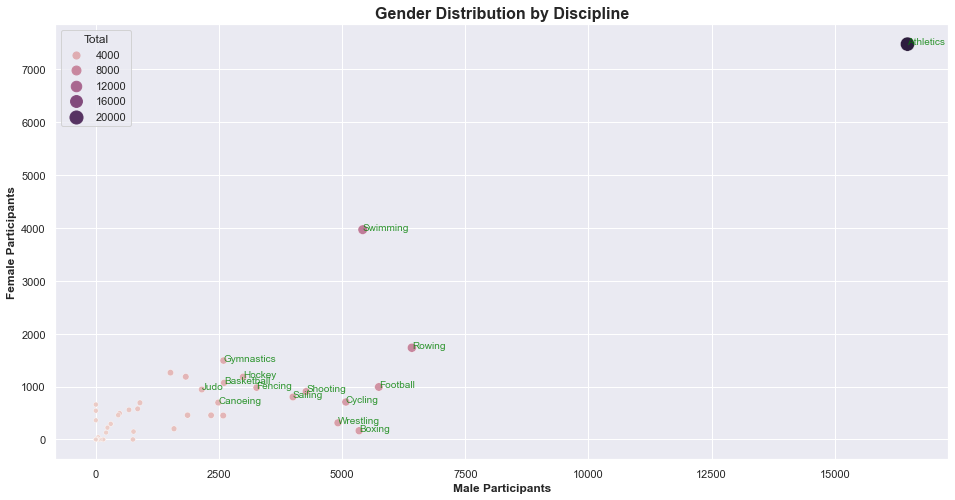

In [162]:
plt.figure(figsize = (16, 8))
sns.scatterplot(data = all_genders, 
                x = "Male", 
                y = "Female", 
                hue = "Total", 
                size = "Total", 
                sizes = (20, 200))
plt.xlabel("Male Participants", 
           fontdict = {"fontsize" : 12, 
                       "fontweight" : "bold"})
plt.ylabel("Female Participants", 
           fontdict = {"fontsize" : 12, 
                       "fontweight" : "bold"})
plt.title("Gender Distribution by Discipline", 
          fontdict = {"fontsize" : 16, 
                      "fontweight" : "bold"})
for i in range(0,15):
    ax = plt.text(x = all_genders.Male[i], 
             y = all_genders.Female[i], 
             s = all_genders.Discipline[i], 
             fontdict = dict(color='green',size=10)
             #bbox = dict(facecolor='yellow',alpha=0.5)
                 )
    ax.set_alpha(.8)
    
plt.savefig(imagepath + 'Gender Distribution by Discipline.png')

<font size="3"> **- ATHLETES** </font>

**1- Most Successful Athletes**

In [163]:
athlete_events_s.head(4)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold


In [164]:
succ_athletes = athlete_events_s[~athlete_events_s["Medal"].isna()].drop("Event", axis = 1)
succ_athletes.head(3) #dataframe

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,City,Sport,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Gold
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920,Antwerpen,Swimming,Bronze
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920,Antwerpen,Swimming,Bronze


In [165]:
succ_athletes.Name.unique().size #34088 and unique ones 24545

24545

In [166]:
succ_athletes_np = succ_athletes.drop(["City", "Team"], axis = 1).to_numpy()

In [167]:
succ_athletes_np[[0,1,2,3]] #array

array([[4, 'Edgar Lindenau Aabye', 'M', 34.0, nan, nan, 'DEN', 1900,
        'Tug-Of-War', 'Gold'],
       [15, 'Arvo Ossian Aaltonen', 'M', 30.0, nan, nan, 'FIN', 1920,
        'Swimming', 'Bronze'],
       [15, 'Arvo Ossian Aaltonen', 'M', 30.0, nan, nan, 'FIN', 1920,
        'Swimming', 'Bronze'],
       [17, 'Paavo Johannes Aaltonen', 'M', 28.0, 175.0, 64.0, 'FIN',
        1948, 'Gymnastics', 'Bronze']], dtype=object)

In [168]:
succ_ath = pd.DataFrame(columns = ["Name", "NOC", "Apps", "Gold", "Silver", "Bronze", "Total", "Sport"])
succ_ath["Name"] = succ_athletes.Name
succ_ath["NOC"] = succ_athletes.NOC
succ_ath["Sport"] = succ_athletes.Sport

In [169]:
succ_ath["Apps"] = 0
succ_ath["Gold"] = 0
succ_ath["Silver"] = 0
succ_ath["Bronze"] = 0
succ_ath["Total"] = 0

In [170]:
succ_ath = succ_ath.drop_duplicates("Name")

In [171]:
succ_ath.head(3)

,Name,NOC,Apps,Gold,Silver,Bronze,Total,Sport
3,Edgar Lindenau Aabye,DEN,0,0,0,0,0,Tug-Of-War
37,Arvo Ossian Aaltonen,FIN,0,0,0,0,0,Swimming
41,Paavo Johannes Aaltonen,FIN,0,0,0,0,0,Gymnastics


In [172]:
succ_ath_np = succ_ath.to_numpy()

In [173]:
succ_athletes_np[succ_athletes_np[:,1] == "Michael Fred Phelps, II"].shape[0]

28

In [174]:
for item in succ_ath_np[:,0]:
    if item.find("Phelps") != -1:
        print(item)

Brian Eric Phelps
Jaycie Lynn Phelps (-McClure, -Marus)
Mason Elliott Phelps
Michael Fred Phelps, II
Richard Lawson Phelps, Jr.
Harlow Phelps Rothert


In [175]:
athlete_events_np = athlete_events_s.to_numpy()

In [176]:
athlete_events_np[athlete_events_np[:,1] == "Michael Fred Phelps, II"].shape[0]

30

In [177]:
succ_ath_np[0]

array(['Edgar Lindenau Aabye', 'DEN', 0, 0, 0, 0, 0, 'Tug-Of-War'],
      dtype=object)

In [178]:
for i in range(0, succ_athletes_np.shape[0]):
    name = succ_athletes_np[i,1]
    succ_ath_np[succ_ath_np[:,0] == name, 5] = succ_athletes_np[succ_athletes_np[:,1] == name].shape[0] 
    if succ_athletes_np[i, 9] == "Gold":
        succ_ath_np[succ_ath_np[:,0] == name, 2] += 1
    elif succ_athletes_np[i, 9] == "Silver":
        succ_ath_np[succ_ath_np[:,0] == name, 3] += 1
    else : #succ_athletes_np[i, 9] == "Bronze":
        succ_ath_np[succ_ath_np[:,0] == name, 4] += 1

In [179]:
succ_ath_np[succ_ath_np[:,0] == "Michael Fred Phelps, II"]
#succ_ath_np[succ_ath_np[:,0] == name, 6] = athlete_events_np[athlete_events_np[:,1] == name].shape[0]

array([['Michael Fred Phelps, II', 'USA', 23, 3, 2, 28, 0, 'Swimming']],
      dtype=object)

In [180]:
ath_apps = pd.DataFrame(columns = ["Name", "Count"])
ath_apps["Name"] = athlete_events_s["Name"].value_counts().index
ath_apps["Count"] = athlete_events_s["Name"].value_counts().values

In [181]:
ath_apps[ath_apps["Name"] == "Michael Fred Phelps, II"]

,Name,Count
15,"Michael Fred Phelps, II",30


In [182]:
ath_apps_np = ath_apps.to_numpy()

In [183]:
succ_ath_np[succ_ath_np[:,0] == "Michael Fred Phelps, II"]

array([['Michael Fred Phelps, II', 'USA', 23, 3, 2, 28, 0, 'Swimming']],
      dtype=object)

In [184]:
for name in succ_ath["Name"].values:
    succ_ath_np[succ_ath_np[:,0] == name, 6] = ath_apps_np[ath_apps_np[:,0] == name, 1]

In [185]:
succ_ath = pd.DataFrame(succ_ath_np, columns = ["Name", "NOC", "Gold", "Silver", "Bronze", "Total", "Apps", "Sport"])

In [186]:
succ_ath = succ_ath.sort_values(by = "Total", ascending = False)

In [187]:
succ_ath = succ_ath.reset_index(drop = True)

In [219]:
succ_ath["Ratio(T/A)"] = ""

In [221]:
succ_ath["Ratio(T/A)"] = succ_ath["Total"]/succ_ath["Apps"]

In [224]:
succ_ath["Ratio(T/A)"] = succ_ath["Ratio(T/A)"].apply(lambda x: round(x, 2))

In [228]:
succ_ath = succ_ath[["Name", "NOC", "Gold", "Silver", "Bronze", "Total", "Apps", "Ratio(T/A)", "Sport"]]

In [229]:
succ_ath.head(20)

,Name,NOC,Gold,Silver,Bronze,Total,Apps,Ratio(T/A),Sport
0,"Michael Fred Phelps, II",USA,23,3,2,28,30,0.93,Swimming
1,Larysa Semenivna Latynina (Diriy-),URS,9,5,4,18,19,0.95,Gymnastics
2,Nikolay Yefimovich Andrianov,URS,7,5,3,15,24,0.62,Gymnastics
3,Borys Anfiyanovych Shakhlin,URS,7,4,2,13,24,0.54,Gymnastics
4,Takashi Ono,JPN,5,4,4,13,33,0.39,Gymnastics
5,Edoardo Mangiarotti,ITA,6,5,2,13,14,0.93,Fencing
6,Paavo Johannes Nurmi,FIN,9,3,0,12,12,1.00,Athletics
7,Birgit Fischer-Schmidt,GDR,8,4,0,12,13,0.92,Canoeing
8,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",USA,8,3,1,12,17,0.71,Swimming
9,Sawao Kato,JPN,8,3,1,12,24,0.50,Gymnastics


In [230]:
succ_ath.to_csv(filepath + 'Count of Medals per Athlete.csv')

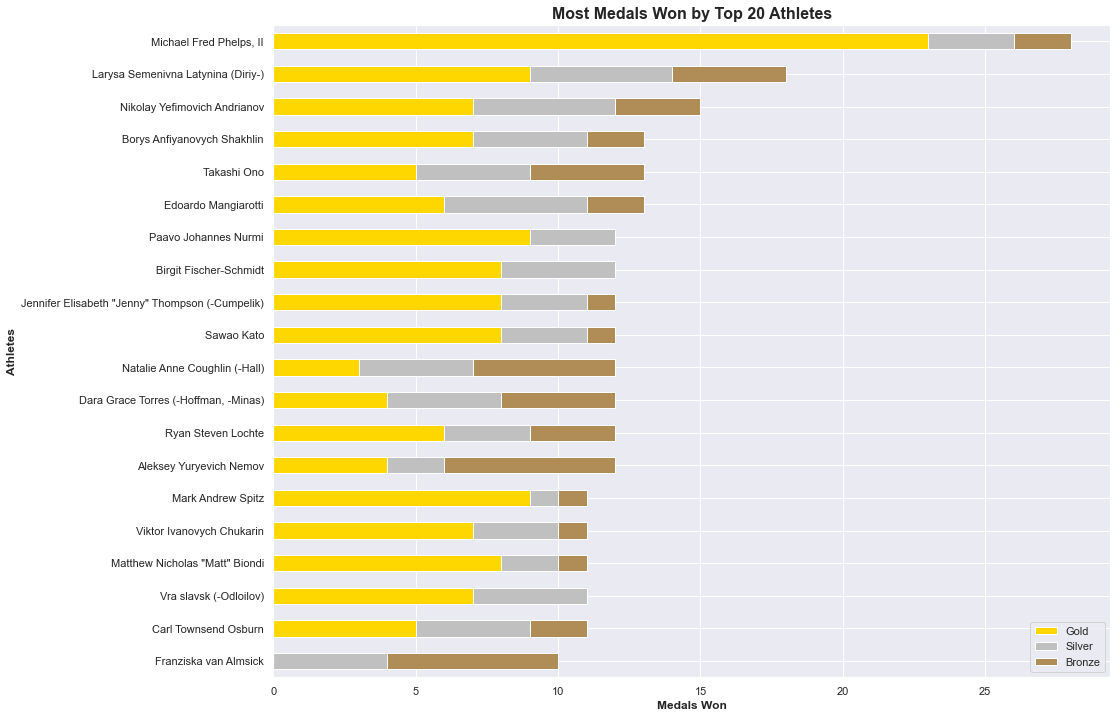

In [190]:
color = ['#FFD700', '#C0C0C0', '#B08D57']

succ_ath.drop(["Total", "Apps", "Sport"], axis = 1).head(20).plot(x = "Name",
                                               kind = 'barh', 
                                               stacked = True, 
                                               figsize = (15, 12), 
                                               color = color)

plt.ylabel("Athletes", 
           fontdict = {"fontsize" : 12, 
                       "fontweight" : "bold"})
plt.xlabel("Medals Won", 
           fontdict = {"fontsize" : 12, 
                       "fontweight" : "bold"})
plt.title("Most Medals Won by Top 20 Athletes", 
          fontdict = {"fontsize" : 16, 
                      "fontweight" : "bold"})
plt.gca().invert_yaxis()

plt.savefig(imagepath + 'Most Medals Won by Top 20 Athletes.png')

**2- Most Apps**

In [241]:
top_30 = succ_ath.sort_values(by = "Total", ascending = False).head(30)

In [ ]:
'''top_30.sort_values(by = "Ratio(T/A)", ascending = False).head(30).plot(x = "Name", 
                                                                       y = "Ratio(T/A)",
                                                                       kind = 'barh', 
                                                                       figsize = (10, 12))'''



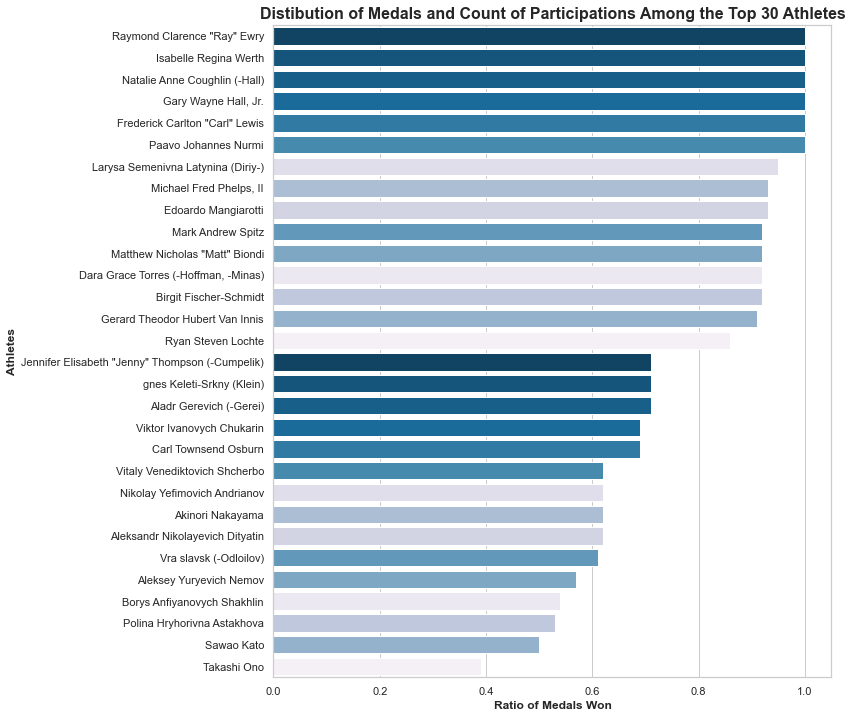

<Figure size 432x288 with 0 Axes>

In [267]:
plt.figure(figsize = (10,12))
sns.set(style="whitegrid", color_codes=True)

data = top_30.groupby("Ratio(T/A)").size()   
pal = sns.color_palette("PuBu", len(data))

rank = data.argsort().argsort()   

sns.barplot(x = top_30.sort_values(by = "Ratio(T/A)", ascending = False).head(30)["Ratio(T/A)"], 
            y = top_30.sort_values(by = "Ratio(T/A)", ascending = False).head(30)["Name"], 
            palette = np.array(pal[::-1])[rank])

plt.ylabel("Athletes", 
           fontdict = {"fontsize" : 12, 
                       "fontweight" : "bold"})
plt.xlabel("Ratio of Medals Won", 
           fontdict = {"fontsize" : 12, 
                       "fontweight" : "bold"})
plt.title("Distibution of Medals and Count of Participations Among the Top 30 Athletes", 
          fontdict = {"fontsize" : 16, 
                      "fontweight" : "bold"})
plt.show()
plt.savefig(imagepath + 'Ratio of Medals won Among the Top 30 Athletes.png')

**3- Age Distributions**

In [192]:
#so my goal here is to see the distribution of age among gold winnig athletes and the sports played since 2000
#something like the plot in this website https://venngage.com/blog/olympics/
succ_athletes.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,City,Sport,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Gold
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920,Antwerpen,Swimming,Bronze


In [193]:
succ_athletes["Sport"].unique()

array(['Tug-Of-War', 'Swimming', 'Gymnastics', 'Handball', 'Hockey',
       'Rowing', 'Football', 'Sailing', 'Cycling', 'Fencing', 'Taekwondo',
       'Athletics', 'Canoeing', 'Water Polo', 'Wrestling',
       'Modern Pentathlon', 'Golf', 'Softball', 'Boxing', 'Basketball',
       'Diving', 'Baseball', 'Volleyball', 'Shooting', 'Judo',
       'Equestrianism', 'Tennis', 'Rugby Sevens', 'Rhythmic Gymnastics',
       'Weightlifting', 'Badminton', 'Beach Volleyball', 'Rugby',
       'Lacrosse', 'Synchronized Swimming', 'Archery', 'Triathlon',
       'Polo', 'Table Tennis', 'Cricket', 'Racquets', 'Croquet',
       'Art Competitions', 'Ice Hockey', 'Roque', 'Figure Skating',
       'Trampolining', 'Basque Pelota', 'Alpinism', 'Motorboating',
       'Jeu De Paume', 'Aeronautics'], dtype=object)

In [194]:
pop_sports = ['Gymnastics', 'Swimming', 'Athletics', 'Football', 'Weightlifting', 'Basketball', 'Volleyball', 
              'Water Sport', 'Tennis', 'Rugby']

# 'Water Sports' = ['Diving', 'Rowing', 'Sailing', 'Rhythmic Gymnastics', 'Synchronized Swimming']

In [195]:
succ_athletes.loc[succ_athletes["Name"] == 'Thomas Robert "Tom" Daley', "Sport"]

48440    Diving
48443    Diving
Name: Sport, dtype: object

In [196]:
succ_athletes['Sport'].replace({'Diving' : 'Water Sport', 
                                'Rowing' : 'Water Sport',
                                'Sailing' : 'Water Sport', 
                                'Rhythmic Gymnastics' : 'Water Sport', 
                                'Synchronized Swimming' : 'Water Sport'}, 
                               inplace = True)

In [197]:
age_distr = succ_athletes[succ_athletes["Sport"].isin(pop_sports) & 
                          (succ_athletes["Medal"] == "Gold")]

In [198]:
age_distr[(age_distr["Year"] == 2012) & (age_distr["Sport"] == "Water Sport")]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,City,Sport,Medal
1533,849,Filip Kamil Adamski,M,29.0,189.0,87.0,Germany,GER,2012,London,Water Sport,Gold
2692,1498,"Charles Benedict ""Ben"" Ainslie",M,35.0,183.0,90.0,Great Britain,GBR,2012,London,Water Sport,Gold
3833,2210,Marina Alabau Neira,F,26.0,164.0,55.0,Spain,ESP,2012,London,Water Sport,Gold
4317,2464,Jo Qesem Ayela Aleh,F,26.0,171.0,58.0,New Zealand,NZL,2012,London,Water Sport,Gold
17010,9111,Anna Rose Bebington-Watkins,F,29.0,183.0,78.0,Great Britain,GBR,2012,London,Water Sport,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...
263399,131805,Wu Minxia,F,26.0,167.0,52.0,China,CHN,2012,London,Water Sport,Gold
263400,131805,Wu Minxia,F,26.0,167.0,52.0,China,CHN,2012,London,Water Sport,Gold
263936,132072,Xu Lijia,F,24.0,176.0,60.0,China,CHN,2012,London,Water Sport,Gold
267384,133777,Ilya Leonidovich Zakharov,M,21.0,177.0,70.0,Russia,RUS,2012,London,Water Sport,Gold


In [199]:
age_event = pd.DataFrame(columns = ["Year"] + pop_sports)

In [200]:
age_event["Year"] = sorted(age_distr["Year"].unique())

In [201]:
age_event.head()

,Year,Gymnastics,Swimming,Athletics,Football,Weightlifting,Basketball,Volleyball,Water Sport,Tennis,Rugby
0,1896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [202]:
age_distr.loc[(age_distr["Sport"] == "Swimming") & (age_distr["Year"] == 2016), "Age"].mean()

23.267605633802816

In [203]:
for yr in age_event["Year"].values:
    for evnt in pop_sports:
        age_event.loc[age_event["Year"] == yr, evnt] = age_distr.loc[(age_distr["Sport"] == evnt) & (age_distr["Year"] == yr), "Age"].mean()

In [204]:
# some sports weren't introduced to the olympics until later and some existed but kept recurring over and over so i'll just 
# replace the missing values with the mean
age_event = age_event.fillna(age_event.mean())

In [205]:
age_event

,Year,Gymnastics,Swimming,Athletics,Football,Weightlifting,Basketball,Volleyball,Water Sport,Tennis,Rugby
0,1896,25.045455,18.666667,21.916667,24.684524,21.000000,25.263921,25.711675,26.376283,23.333333,24.197658
1,1900,28.000000,21.750000,24.148148,23.857143,25.156349,25.263921,25.711675,29.380952,26.666667,23.928571
2,1904,26.736842,22.461538,24.571429,25.083333,21.000000,25.263921,25.711675,25.294118,23.666667,24.197658
3,1906,24.772727,21.000000,26.428571,23.000000,24.500000,25.263921,25.711675,21.384615,22.600000,24.197658
4,1908,22.487179,22.625000,25.705882,26.000000,25.156349,25.263921,25.711675,32.289474,35.375000,24.266667
5,1912,24.119403,21.533333,23.566038,25.642857,25.156349,25.263921,25.711675,28.080000,27.916667,24.197658
6,1920,25.722222,21.437500,24.954545,25.928571,27.400000,25.263921,25.711675,30.206897,27.750000,23.437500
7,1924,28.000000,18.944444,24.697674,24.714286,26.200000,25.263921,25.711675,25.378378,26.750000,25.157895
8,1928,24.666667,19.809524,22.777778,26.117647,25.166667,25.263921,25.711675,25.750000,26.115625,24.197658
9,1932,24.466667,19.000000,22.868421,24.684524,26.000000,25.263921,25.711675,26.306122,26.115625,24.197658


In [206]:
age_event.to_csv(filepath + 'Average Age of Popular Sports.csv')

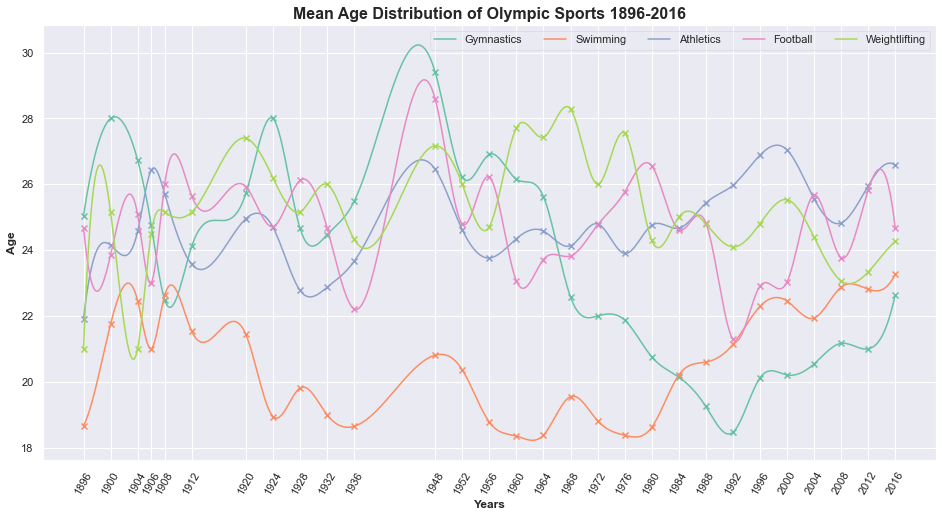

In [207]:
fig,ax = plt.subplots(figsize = (16, 8))

for evnt in pop_sports[:5]:
    
    model = make_interp_spline(age_event["Year"], age_event[evnt])
    xs = np.linspace(1896, 2016 ,500)
    ys = model(xs)
    
    ax.scatter(age_event["Year"], age_event[evnt], marker = 'x')
    data = ax.plot(xs, ys, label = evnt)

plt.xlabel("Years", 
           fontdict = {"fontsize" : 12, 
                       "fontweight" : "bold"})
plt.ylabel("Age", 
           fontdict = {"fontsize" : 12, 
                       "fontweight" : "bold"})
plt.title("Mean Age Distribution of Olympic Sports 1896-2016", 
          fontdict = {"fontsize" : 16, 
                      "fontweight" : "bold"})

ax.set_xticks(age_event["Year"])
plt.xticks(rotation = 60)
plt.legend(loc = 'best', ncol=len(pop_sports), framealpha = 0.4)

plt.savefig(imagepath + 'Mean Age Distribution of Popular Sports 1896-2016.png')

<font size="3"> **- Evolution:** </font>

**1- Physique (Height for few disciplines and gender)**

In [208]:
# how the height/weight of athletes changed over time for these main sports
# 'Gymnastics', 'Swimming', 'Athletics', 'Weightlifting', 'Basketball', 'Water Sport'
# i'll stick with the successful athletes

In [209]:
physique_h = succ_athletes[succ_athletes["Height"].notnull()].sort_values(by = "Year").drop(["Name", "Age", "Team", "City"], axis = 1)

In [210]:
physique_h.head(2)

,ID,Sex,Height,Weight,NOC,Year,Sport,Medal
44063,22700,M,175.0,72.0,USA,1896,Athletics,Bronze
105834,53542,M,173.0,69.0,USA,1896,Athletics,Silver


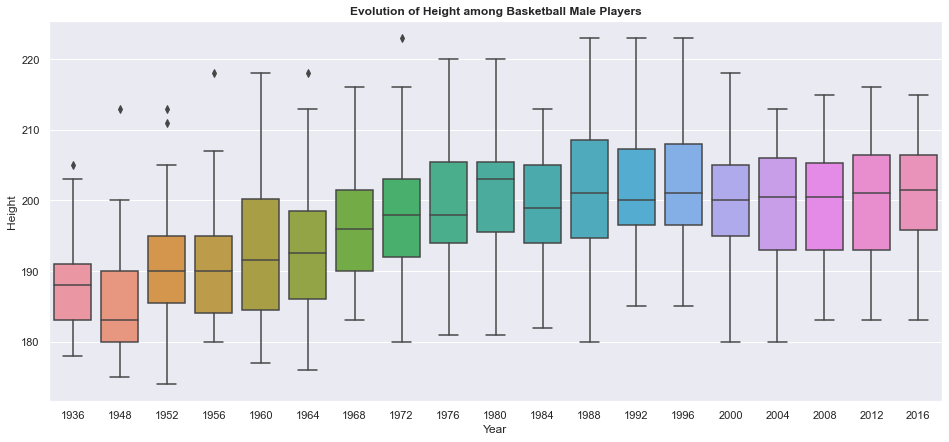

In [211]:
#For MEN in BASKETBALL:
plt.figure(figsize = (16, 7))
sns.boxplot(x = "Year", 
            y = "Height", 
            data = physique_h[(physique_h["Sex"] == "M") & (physique_h["Sport"] == 'Basketball')])

plt.title("Evolution of Height among Basketball Male Players", fontweight = 'bold')

plt.savefig(imagepath + 'Evolution of Height among Basketball Male Players.png')

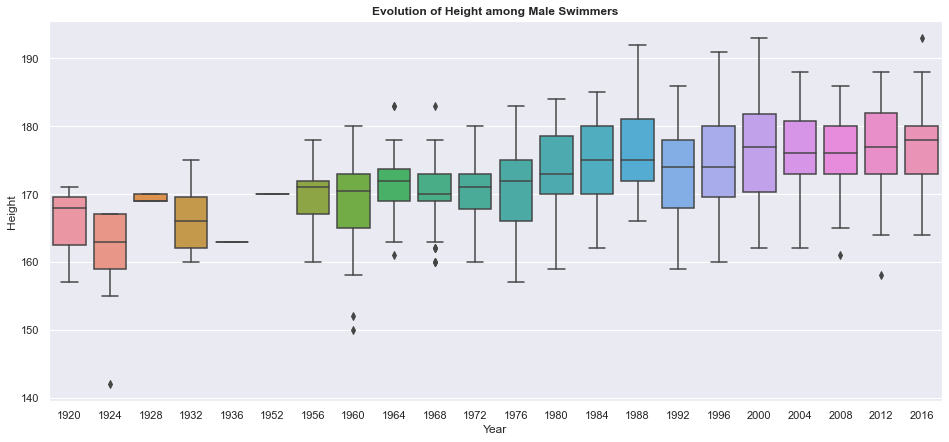

In [212]:
#For MEN in SWIMMING:
plt.figure(figsize = (16, 7))
sns.boxplot(x = "Year", 
            y = "Height",
            data = physique_h[(physique_h["Sex"] == "F") & (physique_h["Sport"] == 'Swimming')])

plt.title("Evolution of Height among Male Swimmers", fontweight = 'bold')

plt.savefig(imagepath + 'Evolution of Height among Male Swimmers.png')

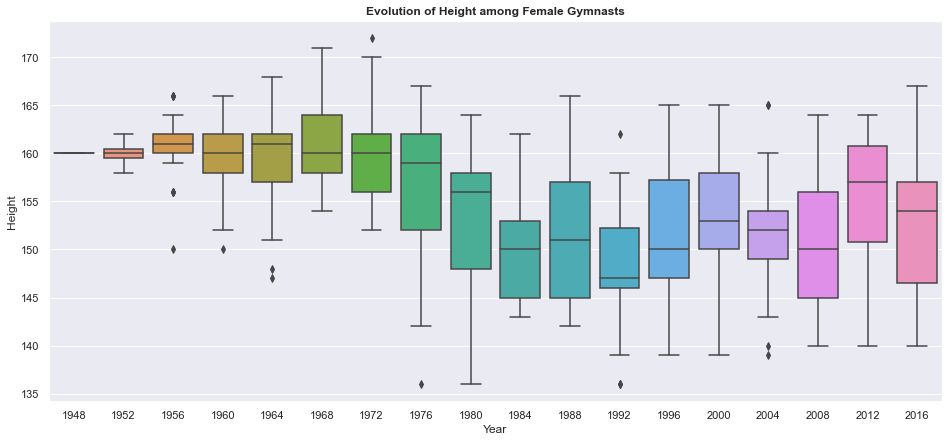

In [213]:
#For WOMEN in GYMNASTICS:
plt.figure(figsize = (16, 7))
sns.boxplot(x = "Year", 
            y = "Height", 
            data = physique_h[(physique_h["Sex"] == "F") & (physique_h["Sport"] == 'Gymnastics')])

plt.title("Evolution of Height among Female Gymnasts", fontweight = 'bold')

plt.savefig(imagepath + 'Evolution of Height among Female Gymnasts.png')

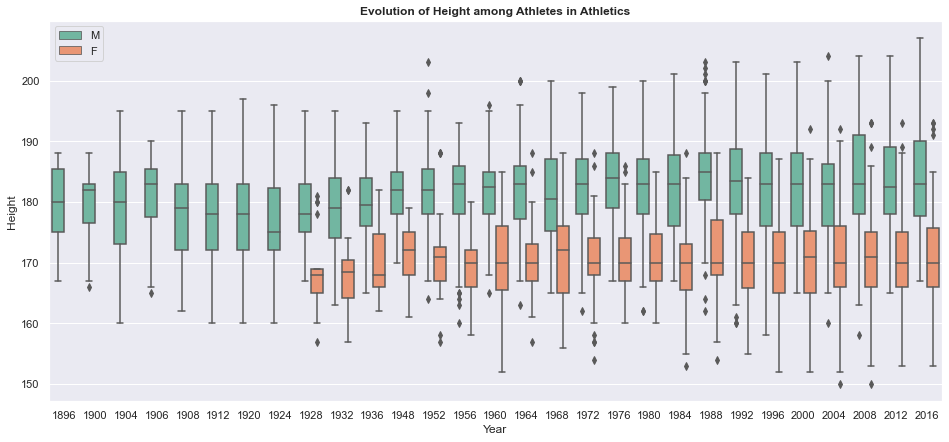

In [214]:
#For WOMEN in ATHLETICS:
plt.figure(figsize = (16, 7))
sns.boxplot(x = "Year", 
            y = "Height", 
            hue = "Sex",
            data = physique_h[(physique_h["Sport"] == 'Athletics')])
plt.legend(loc = 'best')
plt.title("Evolution of Height among Athletes in Athletics", fontweight = 'bold')

plt.savefig(imagepath + 'Evolution of Height among Athletes in Athletics.png')

**2- Physique (Weight for few Disciplines and Gender)**

In [215]:
physique_w = succ_athletes[succ_athletes["Weight"].notnull()].sort_values(by = "Year").drop(["Name", "Age", "Team", "City"], axis = 1)

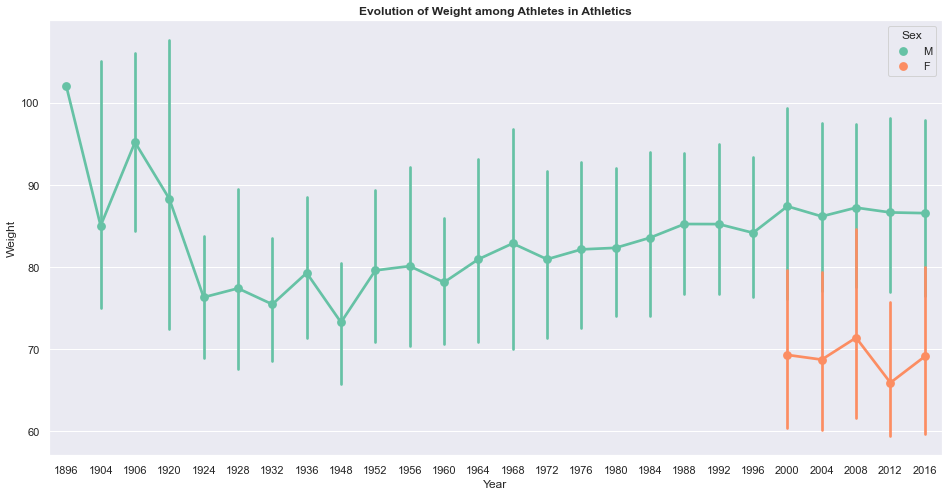

In [218]:
plt.figure(figsize = (16, 8))
sns.pointplot(x = "Year", 
              y = "Weight", 
              hue = "Sex",
              data = physique_w[(physique_w["Sport"] == 'Weightlifting')])

plt.title("Evolution of Weight among Athletes in Athletics", fontweight = 'bold')

plt.savefig(imagepath + 'Evolution of Weight among Weightlifting Athletes.png')

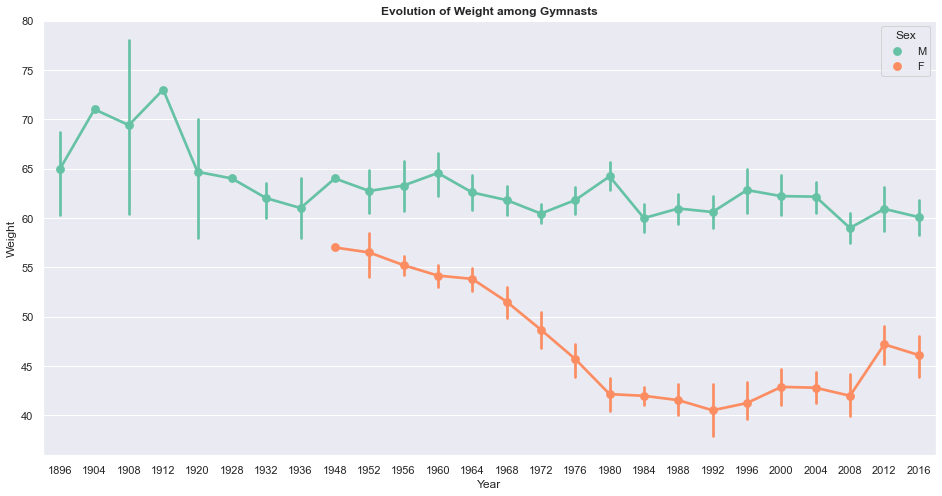

In [217]:
plt.figure(figsize = (16, 8))
sns.pointplot(x = "Year", 
              y = "Weight", 
              hue = "Sex",
              data = physique_w[(physique_w["Sport"] == 'Gymnastics')])

plt.title("Evolution of Weight among Gymnasts", fontweight = 'bold')

plt.savefig(imagepath + 'Evolution of Weight among Gymnasts.png')